# ArcGIS and Python

Esri has made all of the [geoprocessing tools](https://pro.arcgis.com/en/pro-app/tool-reference/main/arcgis-pro-tool-reference.htm) in ArcMap available to Python via the [ArcPy Python module](https://pro.arcgis.com/en/pro-app/arcpy/main/arcgis-pro-arcpy-reference.htm). Because of this, you can use Python to automate any geoprocessing workflows that you might have for ArcGIS, just as you would with ModelBuilder. In fact, ModelBuilder models can be exported to Python scripts, although that's not a two-way street -- as far as I know, Python scripts can't be converted to models.

You can also add your Python scripts as tools in ArcMap and ArcGIS Pro. Once you've done that, you can run them or add them to a model, just like any other tool.

ArcPy scripts don't need to be run from inside of ArcGIS. In fact, you can run them without ever opening ArcGIS. You do, however, need ArcGIS installed because that's the only way to get ArcPy, and you also need a valid ArcGIS license on the computer. You won't be able to run any geoprocessing tools that aren't licensed.

You can mix and match Python modules as you see fit. If you want to use Pandas (a data analysis module) and ArcPy in the same script and turn that into an ArcGIS tool, there's nothing stopping you. The only caveats are that whatever modules you're using must also be installed on the machine where the script is being run, and if you install a 3rd party module you also need to make sure it's compatible with the ArcGIS Python.

One thing to be aware of is that ArcPy only works with very specific versions of Python. You cannot download just any version of Python from the web and expect it to work with ArcPy. For ArcGIS 10, you **must** have Python 2.7, and it must be compiled so that it's compatible with ArcPy (meaning that not all 2.7 versions will work). For ArcGIS Pro, you need Python 3.6. I haven't tried to get other Python distributions (like Anaconda) to work with it; instead we're using a custom environment built with the tools that come with ArcGIS Pro. For now I want you to learn how to use the Python language, but later in the semester I should probably explain how the environments work!

For the most part, Esri kept the tools the same between ArcMap and ArcGIS Pro, so you could use everything you learn here with ArcMap, too.

# Esri documentation

Esri provides excellent documentation for their tools. I have the [ArcPy documentation](https://pro.arcgis.com/en/pro-app/arcpy/main/arcgis-pro-arcpy-reference.htm) and the [Geoprocessing Tool Reference](https://pro.arcgis.com/en/pro-app/tool-reference/main/arcgis-pro-tool-reference.htm) bookmarked, and you might want to do the same. Because it's impossible to remember everything that you can do with ArcGIS, it's essential that you learn how to use the documentation. I'll provide lots of links to start with, but those will diminish over time because you need to learn how to find what you need on your own. If you can't do that, you can't be effective writing Python code for ArcGIS. Some of the text below will go into more detail about how to use the documentation.

# Using ArcPy

You import `arcpy` just like any other Python module, such as `math` or `random`. It takes it a while, though, so be patient (it's just like waiting for ArcGIS to start up!). You'll know it's done when `In [*]` gets a number inside the brackets instead of a star, like `In [1]`.

In [ ]:
import arcpy

## Environment settings

Have you ever changed an environment setting when running a tool in ArcGIS? If not, you might not even know what I'm talking about. 

If you're using ArcPro, there's a tab at the top of the tool:

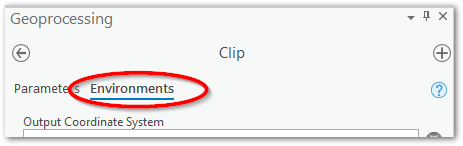


In the Python world, all of the settings through the Environments dialog live on the [arcpy.env](https://pro.arcgis.com/en/pro-app/arcpy/classes/env.htm) object. If you follow the link, you'll see a long list of properties with descriptions of each one.

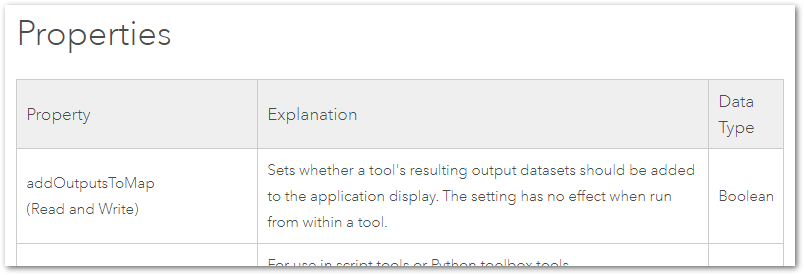

The first column tells you the name of the property and if you're allowed to change it. "Read and Write" means arcpy will let you see the data and also edit it, while "Read Only" means you can only see it. To access any of these settings, use `arcpy.env.name`, where `name` is the name from the Property column. So to access the property shown in the screenshot, you'd use `arcpy.env.addOutputsToMap`.

The second column provides an explanation for what the setting does. 

The last column tells you the data type it expects. So for example, if it says it's a String, you can't try to edit it and provide a number instead-- well, you can try, but you won't be very successful! 

### Current workspace

One environment setting that you'll use pretty much every week in this class is the workspace, which sets the folder that ArcPy looks for things. To set the workspace to a particular folder, do this (**change it to the correct `week_3\data` folder for your computer**, and don't forget to prefix it with an 'r'):

In [ ]:
# Change this to match your computer
arcpy.env.workspace = r'D:\classes\python-gis\week_3\data'

The names of these settings are case-sensitive. If you had used a capital 'W' (e.g. `arcpy.env.Workspace`) then it wouldn't have any effect. Unfortunately, it doesn't spit out an error message, either. It also won't give you an error if the path you provide doesn't actually exist.

You can see what the current workspace is just by looking at the contents of `arcpy.env.workspace`.

In [ ]:
arcpy.env.workspace

### Overwriting existing datasets

Another environment setting that you'll use a lot is `overwriteOutput`. Have you noticed how ArcGIS gives you warnings when you're trying to overwrite an existing dataset? By default, ArcGIS doesn't overwrite existing files, but you'll want it to when testing your homework. To make it do so, set the `overwriteOutput` environment setting to `True`. Pay attention to the capitalization, because it won't work if you get that wrong.

In [ ]:
arcpy.env.overwriteOutput = True

## Listing data

ArcPy has several functions to help you find valid datasets. You **must** set the `arcpy.env.workspace` environment variable before using any of them, because that tells ArcPy where to look.

These functions are documented [here](https://pro.arcgis.com/en/pro-app/arcpy/functions/listfeatureclasses.htm) (the link goes to `ListFeatureClasses`, but use the table of contents on the left side of the page to see the others). We'll try out `ListFeatureClasses` here, but the others are similar.

Let's look at the format of the documentation before trying to use the tool, though. If you look at that webpage, you'll see that it contains a brief Summary of the tool's purpose and then a longer Discussion section. They're both pretty short in this example, but sometimes the discussion is fairly lengthy.

The next section of the documentation is the Syntax. It looks like this for [ListFeatureClasses](https://pro.arcgis.com/en/pro-app/arcpy/functions/listfeatureclasses.htm):

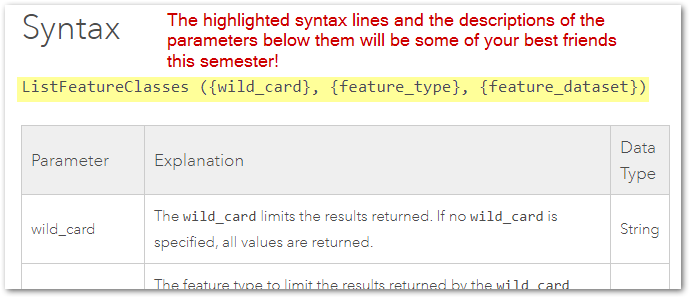

This shows you how to use the tool from Python, except they leave the `arcpy.` part off the beginning. All ArcPy tools must be prefixed with `arcpy.`, even though it's not shown in the documentation. The items in the parentheses are the parameters for the tool. **If a parameter name is surrounded by curly braces, that means that the parameter is optional (but don't include the braces in your code!).** This tool has three optional parameters.

Right below the syntax line is a description of each parameter, including the parameter's data type and possible values, if applicable. For example, the explanation for the `feature_type` parameter lists the available options you can use for that parameter.

Below the list of parameters it has a description, including the data type, of the value returned by the tool. This tool returns a list of strings (you'll see this in action in a moment).

Every tool has a Code sample section down near the bottom of the page, which shows examples of using the tool in Python code. Sometimes the examples will do what you need, but sometimes they won't. The more optional parameters a tool has, the less likely that the example will be exactly what you need. **Do not just skip to the examples without looking at the syntax section, because the examples don't tell you important information about *what* the parameters need to be.**

Now that you understand the basic format of the documentation, let's use `ListFeatureClasses` to list the feature classes in the current workspace:

In [ ]:
# List ALL feature classes in the current workspace.
arcpy.ListFeatureClasses()

Assuming you set `arcpy.env.workspace` correctly in the earlier code cell, that will have returned a list of shapefiles, without the paths.

Because this is a list, you can use it with a `for` loop, like this:

In [ ]:
for filename in arcpy.ListFeatureClasses():
    print(filename)

Remember the three optional parameters for `ListFeatureClasses`? Let's take a look at them now.

### Limiting by name

You can use the `wild_card` parameter to limit the results by name. Use an asterisk (\*) to match one or more characters. So to get only the shapefiles whose names start with 'data', you could do this:

In [ ]:
# List feature classes whose names start with 'data' in the current workspace.
# The star will match anything after 'data' in the name.
arcpy.ListFeatureClasses(wild_card='data*')

To list only the shapefiles with a 5 in the name, you could do this:

In [ ]:
# List feature classes whose names contain a '5' in the current workspace.
# The stars will match anything before or after '5' in the name.
arcpy.ListFeatureClasses(wild_card='*5*')

### Limiting by geometry type

Use the `feature_type` parameter to limit results by geometry type. For example, this is how you'd get only the polygon feature classes (see the Syntax section of the [docs](https://pro.arcgis.com/en/pro-app/arcpy/functions/listfeatureclasses.htm) for the possible types you can look for):

In [ ]:
# List the polygon feature classes in the current workspace.
arcpy.ListFeatureClasses(feature_type='Polygon')

### Problem 1

Use `ListFeatureClass()` to list all of the point shapefiles in the current workspace (the data folder). Use the [docs](https://pro.arcgis.com/en/pro-app/arcpy/functions/listfeatureclasses.htm) to help you.

### Limiting by feature dataset

*If you're not familiar with geodatabases, this next example might make more sense if you read up on them [here](http://desktop.arcgis.com/en/arcmap/latest/manage-data/administer-file-gdbs/file-geodatabases.htm). Pay attention to feature classes and feature datasets.*

The last option to `ListFeatureClasses` is `feature_dataset` and it only applies if you're using a geodatabase. In that case the `workspace` must be set to the geodatabase itself. **Change the `workspace` to the correct location of the `week_3\data\example_data.gdb` file geodatabase on your computer** and then try listing the stand-alone feature classes in the geodatabase. These are the feature classes that don't live inside of a feature dataset.

In [ ]:
# Set the current workspace to a file geodatabase.
arcpy.env.workspace = r'D:\classes\python-gis\week_3\data\example_data.gdb'

# List the stand-alone feature classes in the geodatabase.
arcpy.ListFeatureClasses()

Now list the [feature datasets](http://desktop.arcgis.com/en/arcmap/latest/manage-data/feature-datasets/an-overview-of-working-with-feature-datasets.htm) in the file geodatabase using `ListDatasets`:

In [ ]:
# List the feature datasets in the file geodatabase.
arcpy.ListDatasets()

Now use the `feature_dataset` parameter of `ListFeatureClasses` to to list the feature classes in the `Towns` feature dataset:

In [ ]:
# List the feature classes in the Towns feature dataset in the file geodatabase.
arcpy.ListFeatureClasses(feature_dataset='Towns')

### Limiting by multiple properties

You can use more than  one of these parameters at a time in order to refine your search even more. For example, **change the workspace back to the `week_3\data` folder** and then get all polygon feature classes that start with 'data':

In [ ]:
# Change the current workspace back to the data folder.
arcpy.env.workspace = r'D:\classes\python-gis\week_3\data'

# List the polygon features classes whose names start with 'data'.
arcpy.ListFeatureClasses(wild_card='data*', feature_type='Polygon')

That last example can be shortened like this (see the next section on skipping parameters for more info):

In [ ]:
arcpy.ListFeatureClasses('data*', 'Polygon')

## Skipping parameters, part 1

You might have noticed that the `ListFeatureClasses` examples used keywords to specify the parameter being provided (e.g. `feature_type=` or `wild_card=`). Normally you have to provide parameters in the same order that they're listed in the documentation, but you can get around that requirement by using the parameter names (or *keywords*). This also works well for skipping optional parameters. For example, say you wanted to list the polygon feature classes, but didn't provide the `feature_type` keyword, like this: 

In [ ]:
arcpy.ListFeatureClasses('Polygon')

That didn't return any results, but you know there are polygon shapefiles in your data folder. The problem is that Python thinks you're referring to the `wild_card` parameter because it's the first one listed in the function definition:

`ListFeatureClasses ({wild_card}, {feature_type}, {feature_dataset})`

Since it thinks you're referring to `wild_card`, the tool is looking for shapefiles that are named "Polygon" instead of shapefiles that hold polygon data.

You got around this problem before by providing the parameter name (e.g. `arcpy.ListFeatureClasses(feature_type='Polygon')`), but you can also use the `None` keyword or an empty string (`''`) to act as a placeholder for the `wild_card` parameter. All three of these examples accomplish the same thing:

In [ ]:
arcpy.ListFeatureClasses(feature_type='Polygon')

In [ ]:
arcpy.ListFeatureClasses(None, 'Polygon')

In [ ]:
arcpy.ListFeatureClasses('', 'Polygon')

Personally, I prefer using parameter names because it usually makes it so you can tell what's going on without reading the documentation.

## Describing data
You can use the [Describe function](https://pro.arcgis.com/en/pro-app/arcpy/functions/describe.htm) to get information about a file. This function returns a [Describe object](https://pro.arcgis.com/en/pro-app/arcpy/functions/describe-object-properties.htm) (yep, they both have the same name). The information contained in this object depends on what type of data you passed to the function, but all of them will at least have the properties documented [here](https://pro.arcgis.com/en/pro-app/arcpy/functions/describe-object-properties.htm). The table of contents on the left side of that webpage lists all of the possible types of `Describe` objects.

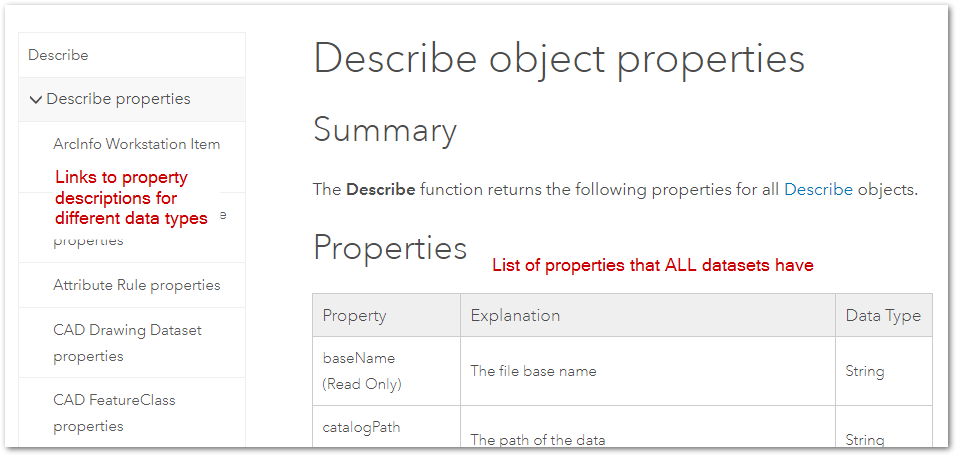

Let's use the `Describe()` function to get some info about the Cache shapefile.

In [ ]:
# Use the Describe function to get a Describe object that contains 
# info about Cache.shp. It looks for Cache.shp in the current workspace.
info = arcpy.Describe('Cache.shp')

# Print out the shapefile's path
print('Path:', info.path)

# Print out the shapefile's data type
print('Data type:', info.dataType)

The list of possible Describe object types is on the left side of the [Describe object](https://pro.arcgis.com/en/pro-app/arcpy/functions/describe-object-properties.htm) documentation. Each of these applies to one or more different dataset types.

Since shapefiles are feature classes, you can guess that your `info` object should have [FeatureClass properties](https://pro.arcgis.com/en/pro-app/arcpy/functions/featureclass-properties.htm). One of the properties listed on that page is `shapeType`.

In [ ]:
info.shapeType

Since a shapefile isn't a raster dataset, it won't have any of the [Raster Dataset properties](https://pro.arcgis.com/en/pro-app/arcpy/functions/raster-dataset-properties.htm), and if you try to use one of them you'll get an error, like this:

In [ ]:
info.bandCount

It's telling you that your `info` object doesn't have anything called `bandCount`. That's because it contains information about a shapefile, which doesn't have bands.

Go back to the [FeatureClass properties](https://pro.arcgis.com/en/pro-app/arcpy/functions/featureclass-properties.htm) page. In the Summary section, it says that [Table properties](https://pro.arcgis.com/en/pro-app/arcpy/functions/table-properties.htm) and [Dataset properties](https://pro.arcgis.com/en/pro-app/arcpy/functions/dataset-properties.htm) are also supported by feature classes, so you can use any of those properties, as well. 

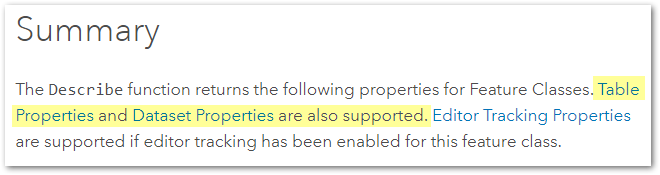

The `extent` property is from the Dataset properties section, so let's try it:

In [ ]:
info.extent

That's not very useful! It prints that way because the `extent` property returns an `Extent` object, which isn't a nice string or number. If you go back to the [Dataset properties](https://pro.arcgis.com/en/pro-app/arcpy/functions/dataset-properties.htm) page and look at the explanation for the `extent` property, it has a link to the documentation for [Extent](https://pro.arcgis.com/en/pro-app/arcpy/classes/extent.htm) objects. 

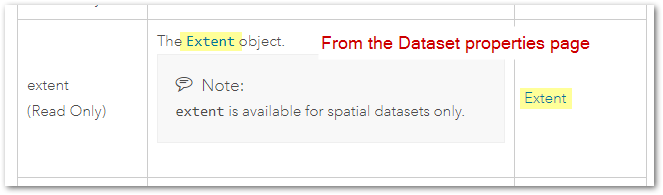

If you follow that link and look at the properties for an `Extent` object, you can see that you can get the bounding coordinates for the extent with four properties:

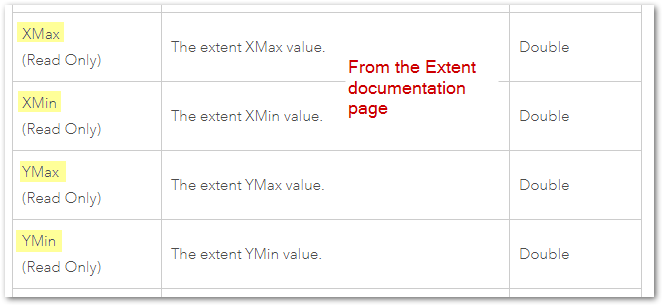
So let's get them!

In [ ]:
extent = info.extent
print(extent.XMin, extent.XMax, extent.YMin, extent.YMax)

### Problem 2

Get the spatial reference used by the shapefile. 

You already have the `info` variable, which is a `Describe` object. Use the links above to to look at the Dataset properties and figure out how to get the spatial reference **from `info`**. It won't look like anything useful yet.

### Problem 3

On the documentation page about Dataset properties, where it talks about spatial references, there's a link to the spatial reference documentation. Follow that link and then figure out how to get the name of the spatial reference object from problem 2. (If you don't get `'NAD_1983_UTM_Zone_12N'`, you've got something wrong.)

## Running geoprocessing tools

You can run all of the tools in ArcToolbox from Python. As I mentioned earlier, the [online documentation](http://desktop.arcgis.com/en/arcmap/latest/tools/main/a-quick-tour-of-geoprocessing-tool-references.htm) is excellent and it contains all of the information you need. As an example, let's look at the [Clip](http://desktop.arcgis.com/en/arcmap/latest/tools/analysis-toolbox/clip.htm) documentation. Scroll down to the Syntax section and you'll see something like this:

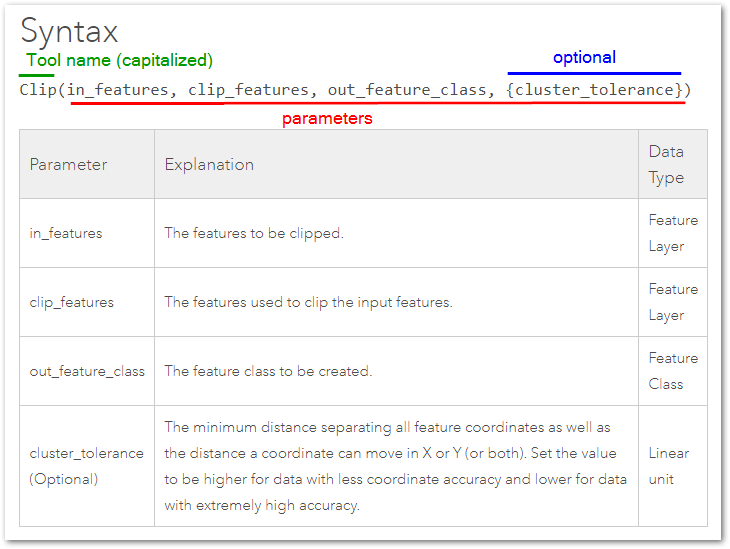

All tools use the same syntax convention. The function name is made up the tool name, followed by an underscore, and then the toolbox identifier (which unfortunately isn't shown in the syntax section, although it *is* shown in the code examples). As before, optional parameters are surrounded by curly braces.

Just like the ArcPy functions we looked at earlier, each parameter for a geoprocessing tool is described on the webpage. I'd like to point out one thing about parameters that can be a list of items. In that case, the first column will have brackets in it, like this: 

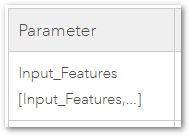

That means that the parameter can either be a single input feature class (the top line) or a list of multiple feature classes (the bottom line, with the brackets that denote a list).

There are also code samples, along with two extra sections at the bottom of the page that you should be aware of. The Environments section lists the environment settings that can affect the results of the tool if they're set, and the Licensing Information section tells you which licensing level you need in order to use the tool (your license gives you the Advanced license level, so you have access to all of the tools).

Let's try using the `Clip` tool to clip the state cities shapefile by Cache County. Remember that you have to prefix the tool name with the module name, `arcpy` in this case. Because you've already set the workspace to your `week_3\data` folder, ArcPy knows where to find the files so you don't have to provide the full paths. Notice that the tool is used like `Clip_analysis()`, even though the webpage just shows `Clip()` in the syntax section.

In [ ]:
# Clip cities.shp by Cache.shp and store the results in cache_cities.shp.
result = arcpy.Clip_analysis('cities.shp', 'Cache.shp', 'cache_cities.shp')

When the above notebook cell has finished running, you should have a shapefile called `cache_cities.shp` in your `week_3\data` folder.

You can also use full paths to the files if the workspace isn't set, or if they're not all in the same workspace. For example, if you wanted your output file to go elsewhere, you could have done something like this:

```python
result = arcpy.Clip_analysis('cities.shp', 'Cache.shp', 'D:\Temp\cache_cities.shp')
```

Although it's not necessary, you captured the results of the clip process in a variable called `result`. This is a [Result object](https://pro.arcgis.com/en/pro-app/arcpy/classes/result.htm), and it contains information about the inputs, outputs, process status, and any messages that would normally be shown in the ArcGIS progress window.

If you print it out, it'll give you the output file path. You can get the same info from the `getOutput` method (the 0 means get the first output, because some tools might have more than one).

In [ ]:
# Print the output filename from the Clip process.
print(result)

# Get the first output from the Clip process and print it.
print(result.getOutput(0))

You can also get the messages that would've been shown in the progress window if you'd done this in ArcGIS:

In [ ]:
# Print the processing messages from the Clip process.
print(result.getMessages())

## Skipping parameters, part 2

Remember how we used parameter names for the `ListFeatureClasses` examples? Using parameter names is especially useful if there are a lot of optional parameters. For example, you should be able to tell that that next line of code creates a new feature class (`CreateFeatureclass` is a really big hint!), but do you have any idea what the `data1.shp` parameter is for?

In [ ]:
arcpy.CreateFeatureclass_management(arcpy.env.workspace, 'sample1.shp', 'POINT', None, None, None, 'data1.shp')

I didn't think so. But can you at least make a guess what it's for by looking at this example instead?

In [ ]:
arcpy.CreateFeatureclass_management(out_path=arcpy.env.workspace, 
                                    out_name='sample2.shp', 
                                    geometry_type='POINT', 
                                    spatial_reference='data1.shp')

This code creates a new point shapefile called `sample2.shp` in the current workspace. From the second example you can tell that `data1.shp` has something to do with a spatial reference -- it's actually telling it to create the new shapefile using whatever spatial reference `data1.shp` uses. That wasn't at all obvious from the first example, but both examples accomplish exactly the same thing. **Sometimes it's worth making the code a little longer in order to make it easier to understand.**

If you wanted to be a bit less explicit but not have to remember that the spatial reference was the seventh parameter in the list, you could only use the parameter names for the ones that were out of order, so things could be shortened to this:

In [ ]:
arcpy.CreateFeatureclass_management(arcpy.env.workspace, 'sample3.shp', 'POINT', spatial_reference='data1.shp')

## Problem 4

*(2 parts)*

**4A.** There's a file geodatabase called `example_data.gdb` in the `week_3\data` folder. Use a geoprocessing tool to import all of the shapefiles in the `week_3\data` folder into the  `example_data.gdb` geodatabase. You'll need to use the folder and the geodatabase names, but **don't use any of the shapefile names**.

The appropriate geoprocessing tool is in the [To Geodatabase toolset](https://pro.arcgis.com/en/pro-app/tool-reference/conversion/an-overview-of-the-to-geodatabase-toolset.htm) and you can do it all in one shot (no loops required). *Hint: How can you use `ListFeatureClasses` to help you with this?*

**4B.** Make sure that it worked by using `ListFeatureClasses` to print out the names of the feature classes in the geodatabase. It should have the following feature classes:

```
sites
Cache
cache_cities
cities
county
data1
data2
data3
data4
data5
sample1
sample2
sample3
ZipCodes
 ```

## Problem 5

*(2 parts)*

**5A.** Generate 150 random points inside the boundaries of Cache County, making sure that none of them are within one kilometer of each other. You can use the Cache shapefile in the `week_3\data` folder to get the boundaries.

If you don't know off-hand which geoprocessing tool to use, use the Search functionality in the Esri docs. The search box is up at the top of the page.

**5B.** Make sure that it worked. Take a screenshot of your results overlaid on Cache County in ArcMap or ArcGIS Pro and save it in the `week_3` folder as `problem5.png`. Then run the following cell in order to display your screenshot.

In [ ]:
from IPython.display import Image
Image('problem5.png')

**Make sure you've saved your notebook!**